<a href="https://colab.research.google.com/github/Chandrashekar0123/Deep_Learning/blob/Transfer_Learning/VGG_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [ ]:
# Load a pre-trained model (VGG16 in this example)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Freeze the pre-trained model layers
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# Add custom classification layers on top of the pre-trained model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.3367 - loss: 1.8999 - val_accuracy: 0.4858 - val_loss: 1.4600
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5051 - loss: 1.4050 - val_accuracy: 0.5263 - val_loss: 1.3505
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5373 - loss: 1.3197 - val_accuracy: 0.5371 - val_loss: 1.3309
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5550 - loss: 1.2697 - val_accuracy: 0.5587 - val_loss: 1.2651
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5710 - loss: 1.2315 - val_accuracy: 0.5629 - val_loss: 1.2589
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5784 - loss: 1.2060 - val_accuracy: 0.5607 - val_loss: 1.2473
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5849 - loss: 1.1923 - val_accuracy: 0.5759 - val_loss: 1.2185
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5830 - loss: 

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5803 - loss: 1.2070
Test Loss: 1.213133692741394
Test Accuracy: 0.5800999999046326


In [ ]:
import numpy as np

In [ ]:
# Make Predictions on New Data
# Predict class for a single test image
img = X_test[0] # Take one image from the test set
img = np.expand_dims(img, axis=0) # Expand dimensions to fit the model input shape

In [ ]:
# Get prediction
pred = model.predict(img)
predicted_class = np.argmax(pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
# Map predicted class index to the class label
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Predicted class: {class_labels[predicted_class[0]]}")

Predicted class: truck


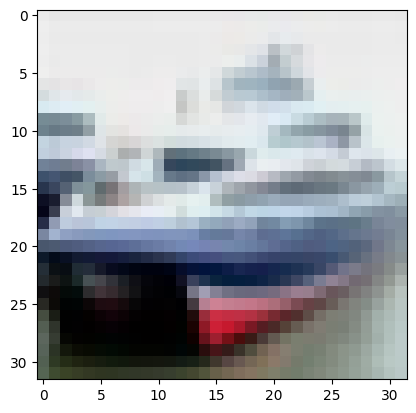

In [ ]:
import matplotlib.pyplot as plt
img = img.squeeze(axis=0)
plt.imshow(img)
img = X_test[1]
plt.show()

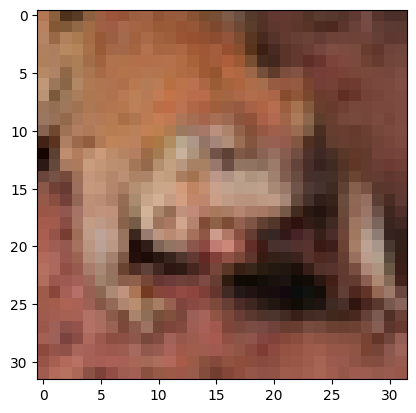

In [ ]:
import matplotlib.pyplot as plt
img = img.squeeze(axis=0)
plt.imshow(img)
img = X_test[5]
plt.show()

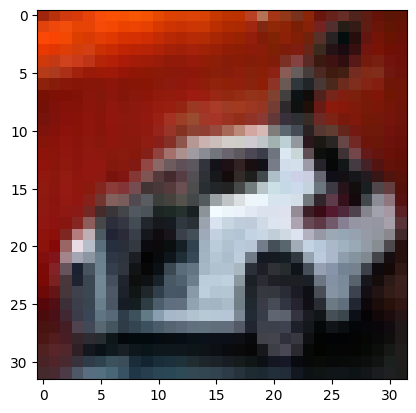

In [ ]:
import matplotlib.pyplot as plt
img = img.squeeze(axis=0)
plt.imshow(img)
img = X_test[6]
plt.show()

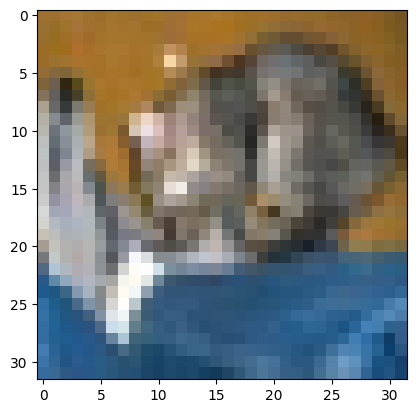

In [ ]:
import matplotlib.pyplot as plt
img = img.squeeze(axis=0)
plt.imshow(img)
img = X_test[0]
plt.show()